In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**Import the data set as csv/xlxs**
Here I imported as csv format

In [3]:
data=pd.read_csv("/content/IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

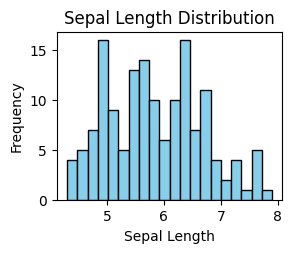

In [11]:
# Sepal Length
plt.subplot(2, 2, 1)
plt.hist(data['sepal_length'], color='skyblue', edgecolor='black', bins=20)
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

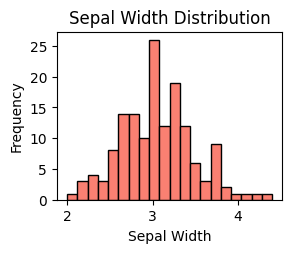

In [12]:
# Sepal Width
plt.subplot(2, 2, 2)
plt.hist(data['sepal_width'], color='salmon', edgecolor='black', bins=20)
plt.title('Sepal Width Distribution')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

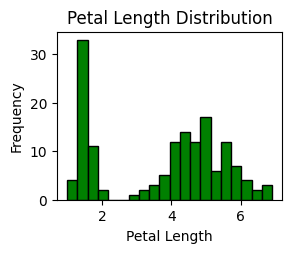

In [13]:
# Petal Length
plt.subplot(2, 2, 3)
plt.hist(data['petal_length'], color='green', edgecolor='black', bins=20)
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

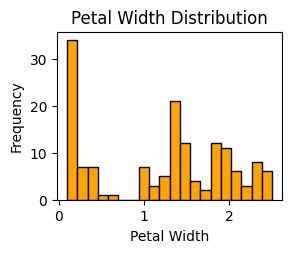

In [14]:
# Petal Width
plt.subplot(2, 2, 4)
plt.hist(data['petal_width'], color='orange', edgecolor='black', bins=20)
plt.title('Petal Width Distribution')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
colors=['lightcoral', 'lightgreen', 'skyblue']

In [17]:
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

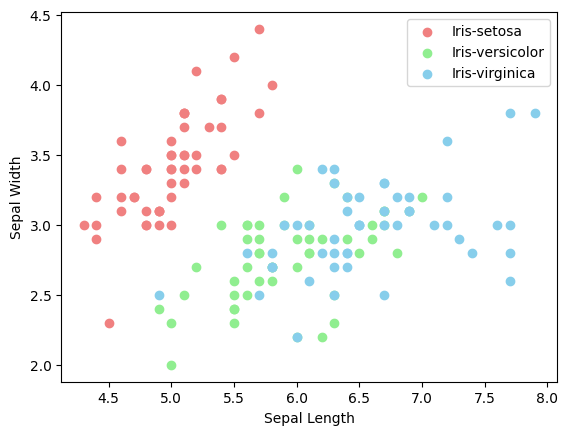

In [18]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [19]:
colors=['tomato', 'mediumseagreen', 'dodgerblue']

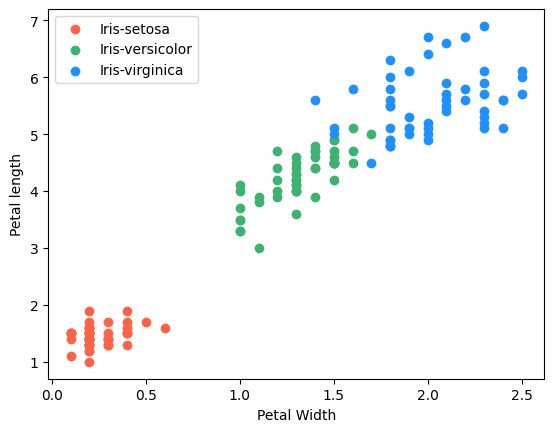

In [21]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_width'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel("Petal Width")
plt.ylabel("Petal length")
plt.legend()

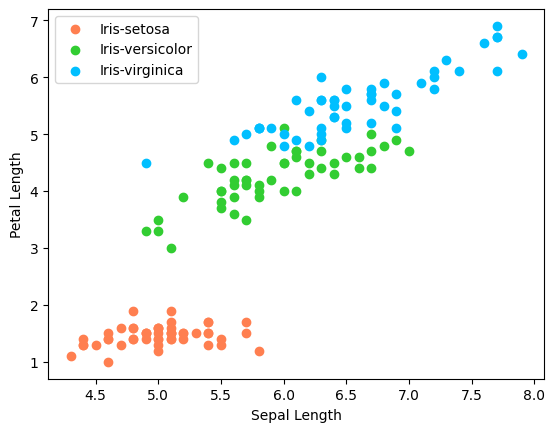

In [22]:
colors = ['coral', 'limegreen', 'deepskyblue']
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

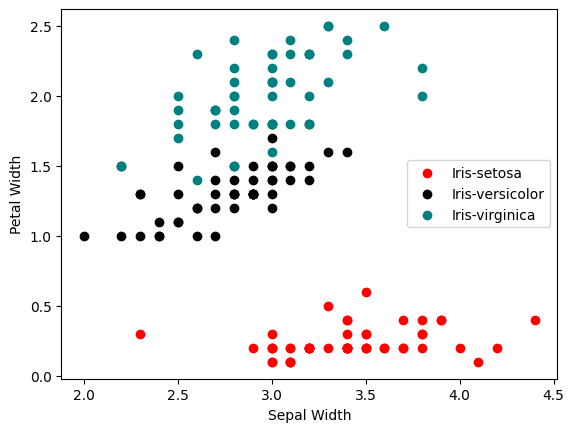

In [23]:
colors=['red','Black','teal']
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

<Axes: >

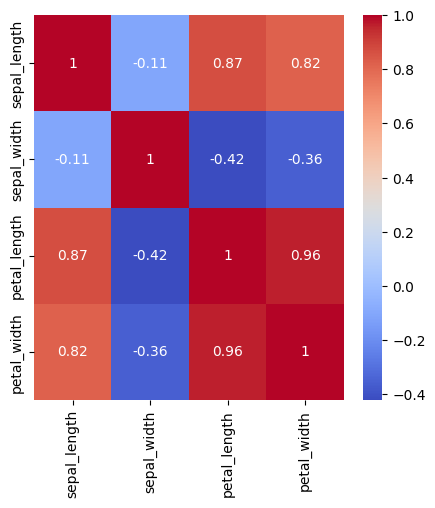

In [30]:
numeric_columns = data.drop(columns='species')
corr = numeric_columns.corr()

fig, axis = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, ax=axis, cmap='coolwarm')

In [31]:
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [32]:
x = data.drop(columns='species')
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [33]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

LogisticRegression()

In [34]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
LR_accuracy = logistic_regression_model.score(x_test, y_test) * 100
KNN_accuracy = knn_model.score(x_test, y_test) * 100
DT_accuracy = decision_tree_model.score(x_test, y_test) * 100

In [37]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")

Accuracy by using Logistic Regression: 95.55555555555556%
Accuracy by using K Nearest Neighbors Algorithm: 97.77777777777777%
Accuracy by using Decision Tree Classifier: 100.0%


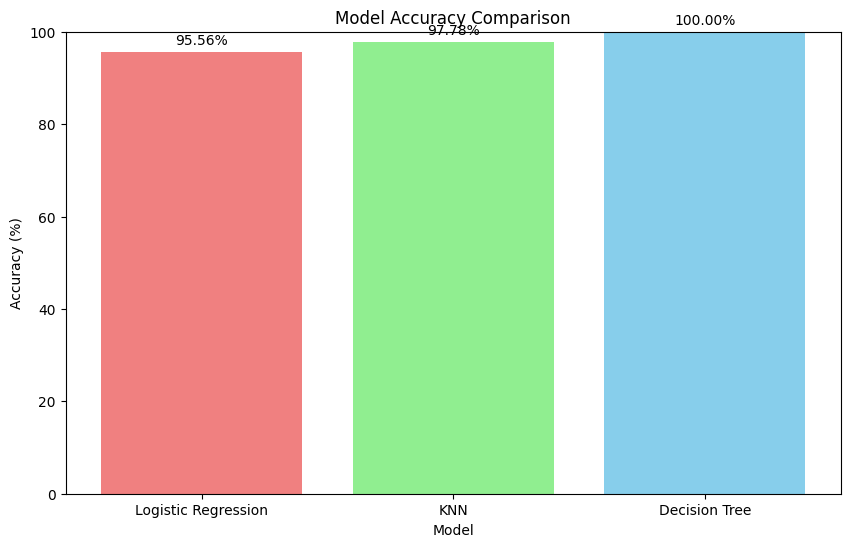

In [38]:
# Accuracy scores
accuracy_scores = [LR_accuracy, KNN_accuracy, DT_accuracy]
models = ['Logistic Regression', 'KNN', 'Decision Tree']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['lightcoral', 'lightgreen', 'skyblue'])
plt.ylim(0, 100)  # Set the y-axis limit to 100 for percentage scale
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()